<a href="https://colab.research.google.com/github/vendiutomo/Investigate-Hotel-Business-using-Data-Visualization/blob/main/Investigate_Hotel_Business_Vendi_Utomo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from matplotlib import rcParams

rcParams["figure.figsize"]= (10,7)
rcParams["lines.linewidth"]= 2.5
rcParams["xtick.labelsize"]= "x-large"
rcParams["ytick.labelsize"]= "x-large"

# Data Preprocessing

## Dataset

In [ ]:
df = pd.read_csv('hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
96219,City Hotel,0,5,2018,October,36,29,1,0,2,...,0,No Deposit,138.0,NaN,0,Personal,75.0,0,0,Check-Out
103352,City Hotel,0,3,2018,February,52,19,1,1,2,...,0,No Deposit,9.0,NaN,0,Personal,79.5,0,2,Check-Out
37913,Resort Hotel,0,310,2019,August,25,22,3,8,2,...,0,No Deposit,40.0,NaN,0,Personal,103.7,0,0,Check-Out
40933,City Hotel,0,3,2017,October,33,9,2,1,2,...,0,No Deposit,3.0,NaN,0,Personal,0.0,0,2,Check-Out
104039,City Hotel,0,50,2019,March,1,3,0,1,2,...,0,No Deposit,14.0,NaN,0,Personal,79.2,0,0,Check-Out


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Duplicated Data

In [ ]:
df.duplicated().sum()

33261

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

## Missing Values

In [ ]:
# mengisi baris kosong pada kolom children dengan nilai minimum (0) - walaupun jumlahnya kecil, dianggap yang tidak mengisi dikarenakan tidak memiliki anak
df['children'].fillna(0, inplace= True)

In [ ]:
# menggisi baris kosong pada kolom city dengan nilai yang paling sering muncul
df['city'].fillna(df['city'].mode()[0], inplace=True)

In [ ]:
# mengisi baris kosong pada kolom agent dengan nilai 0
df['agent'].fillna(0, inplace= True)

In [ ]:
# baris kosong pada kolom company dengan nilai 0
df['company'].fillna(0, inplace= True)

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Invalid Data Value

In [ ]:
# memeriksa nilai kolom meal
df['meal'].value_counts()

Breakfast     67088
No Meal        9442
Dinner         8798
Undefined       454
Full Board      347
Name: meal, dtype: int64

In [ ]:
# mengganti nilai "Undefined" pada kolom "meal" menjadi "No Meal"
df['meal'].replace('Undefined','No Meal', inplace=True)

## Feature Selection

In [ ]:
# membuat kolom "guest_number" yang berisikan total pengunjung dalam 1 pemesanan
df['guest_number'] = df['adults']+df['children']+df['babies']

In [ ]:
# memeriksa jumlah baris yang memiliki nilai 0 pada kolom "guest_number"
df[df['guest_number'] == 0].shape[0]

165

In [ ]:
# menghapus baris yang memiliki nilai 0 pada kolom "guest_number"
df = df.drop(df[df['guest_number'] == 0].index)

In [ ]:
df[df['guest_number'] == 0].shape[0]

0

In [ ]:
# menghapus kolom yang tidak diperlukan
df.drop(['adults','children','babies'], axis=1, inplace=True)

# Monthly Hotel Booking Analysis Based on Hotel Type

## Monthly Total Customer

In [ ]:
# copy data
dfcopy = df.copy()

In [ ]:
# melakukan agregasi data untuk menghitung jumlah booking perbulan berdasarkan jenis hotel
df1 = dfcopy.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
df1.columns = ['hotel_type', 'arrival_month', 'unique_year', 'num_booking'] # mengubah nama kolom tabel

df1

,hotel_type,arrival_month,unique_year,num_booking
0,City Hotel,April,2,3546
1,City Hotel,August,2,4919
2,City Hotel,December,2,4048
3,City Hotel,February,2,2967
4,City Hotel,January,2,2875
5,City Hotel,July,2,5334
6,City Hotel,June,2,5027
7,City Hotel,March,2,2692
8,City Hotel,May,2,4798
9,City Hotel,November,2,4055


## Normalization

In [ ]:
# normalisasi data
df1['avg_booking'] = round(df1['num_booking']/ df1['unique_year'],1)
df1

,hotel_type,arrival_month,unique_year,num_booking,avg_booking
0,City Hotel,April,2,3546,1773.0
1,City Hotel,August,2,4919,2459.5
2,City Hotel,December,2,4048,2024.0
3,City Hotel,February,2,2967,1483.5
4,City Hotel,January,2,2875,1437.5
5,City Hotel,July,2,5334,2667.0
6,City Hotel,June,2,5027,2513.5
7,City Hotel,March,2,2692,1346.0
8,City Hotel,May,2,4798,2399.0
9,City Hotel,November,2,4055,2027.5


## Data Sort by Month

In [ ]:
df1 = df1.sort_values('arrival_month', key=lambda x: pd.to_datetime(x, format='%B').dt.month)
df1 = df1[['hotel_type','arrival_month', 'avg_booking']]
df1

,hotel_type,arrival_month,avg_booking
4,City Hotel,January,1437.5
16,Resort Hotel,January,1013.0
3,City Hotel,February,1483.5
15,Resort Hotel,February,1048.0
7,City Hotel,March,1346.0
19,Resort Hotel,March,966.0
0,City Hotel,April,1773.0
12,Resort Hotel,April,1237.0
20,Resort Hotel,May,1306.5
8,City Hotel,May,2399.0


## Plot

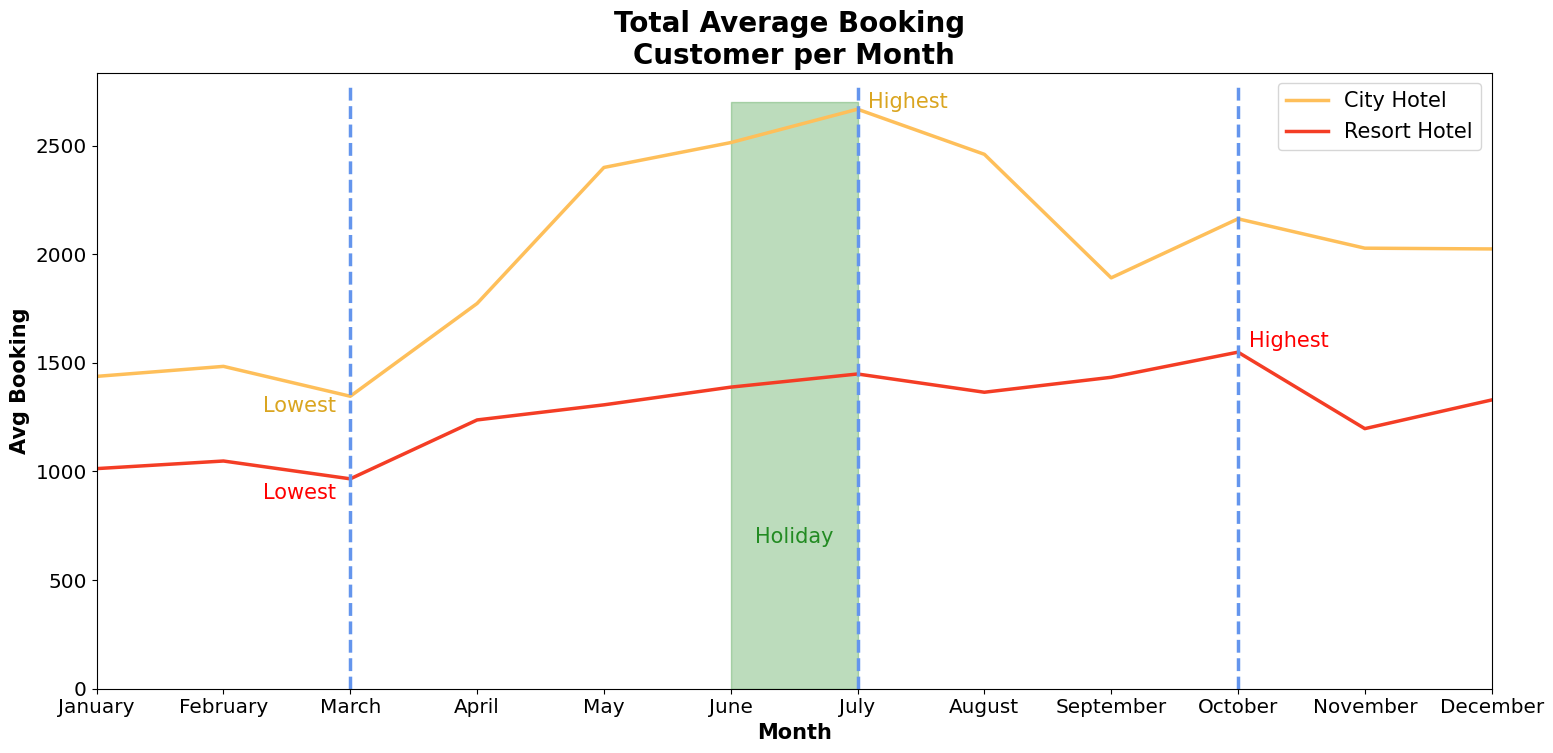

In [ ]:
# plot
plt.figure(figsize=(18,8))
sns.lineplot(data = df1, x = 'arrival_month', y = 'avg_booking', hue = 'hotel_type', palette='YlOrRd')
plt.title('Total Average Booking \nCustomer per Month', weight='bold', fontsize = 20)
plt.ylabel('Avg Booking', weight='bold' , fontsize = 15)
plt.xlabel('Month', weight='bold' , fontsize = 15)

# blok and text
plt.stackplot(np.arange(5,7), [2700], color='forestgreen', alpha=0.3)
plt.text(x = 5.5, y = 700, s = 'Holiday', va = 'center', ha = 'center', fontsize =15, color='forestgreen')

# line and text
plt.axvline(6, color='cornflowerblue', linestyle='--',ymax = 0.98, ymin = 0)
plt.text(x = 6.4, y = 2700, s = 'Highest', va = 'center', ha = 'center', fontsize =15, color='goldenrod')

plt.axvline(9, color='cornflowerblue', linestyle='--',ymax = 0.98, ymin = 0)
plt.text(x = 9.4, y = 1600, s = 'Highest', va = 'center', ha = 'center', fontsize =15, color='red')

plt.axvline(2, color='cornflowerblue', linestyle='--', ymax = 0.98, ymin = 0)
plt.text(x = 1.6, y = 1300, s = 'Lowest', va = 'center', ha = 'center', fontsize =15, color='goldenrod')
plt.text(x = 1.6, y = 900, s = 'Lowest', va = 'center', ha = 'center', fontsize =15, color='red')

plt.xlim(0,11)
plt.legend(loc='best', fontsize =15)
plt.show()

## Insight

- Jumlah booking pada hotel bertipe 'City Hotel' selalu lebih banyak dibandingkan dengan 'Resort Hotel' setiap bulannya.

- Pada musim libur sekolah (Juni - July) jumlah booking hotel naik, terutama untuk hotel berjenis 'City' yang mencapai jumlah pemesanan tertinggi. Sedangkan yang bertipe 'Resort' pemesanan terbanyak pada bulan Oktober.

- Pada libur akhir tahun, terjadi juga kenaikan jumlah pemesanan, namun tidak sebanyak pada hari libur pertangahan tahun.

- Jumlah booking diluar hari libur selalu tidak sebanyak pada saat libur, terutama pada bulan Maret yang mencapai titik terenda rata-rata booking dalam hitungan bulan.

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

## Total duration of stay

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85964 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85964 non-null  object 
 1   is_canceled                     85964 non-null  int64  
 2   lead_time                       85964 non-null  int64  
 3   arrival_date_year               85964 non-null  int64  
 4   arrival_date_month              85964 non-null  object 
 5   arrival_date_week_number        85964 non-null  int64  
 6   arrival_date_day_of_month       85964 non-null  int64  
 7   stays_in_weekend_nights         85964 non-null  int64  
 8   stays_in_weekdays_nights        85964 non-null  int64  
 9   meal                            85964 non-null  object 
 10  city                            85964 non-null  object 
 11  market_segment                  85964 non-null  object 
 12  distribution_channel           

In [ ]:
df2 = dfcopy.copy()

In [ ]:
# membuat kolom 'stay_duration' yang berisikan lama durasi menginap
df2['stay_duration'] = df2['stays_in_weekdays_nights'] + df2['stays_in_weekend_nights']
df2[['city', 'stay_duration']]

,city,stay_duration
0,Kota Denpasar,0
1,Kota Denpasar,0
2,Kabupaten Bangka,1
3,Kabupaten Bangka,1
4,Kabupaten Bangka,2
...,...,...
119385,Kabupaten Magelang,7
119386,Kota Yogyakarta,7
119387,Kabupaten Bandung,7
119388,Kabupaten Bangka,7


## Group the values ​​of the new column

<ipython-input-203-e027e155bf39>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['stay_duration'])


<Axes: xlabel='stay_duration', ylabel='Density'>

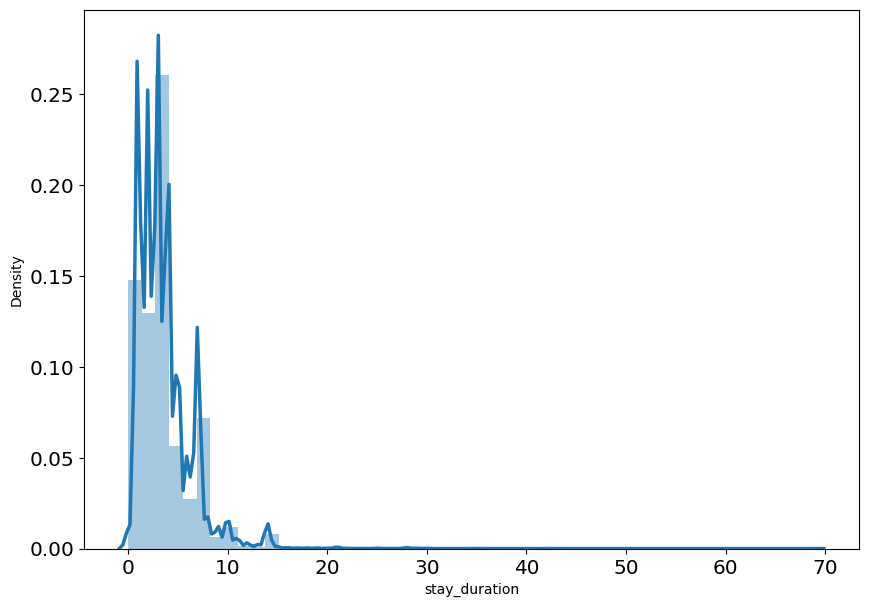

In [ ]:
# memeriksa sebaran data dari kolom 'stay_duration'
sns.distplot(df2['stay_duration'])

In [ ]:
# mengelompokkan data berdasarkan waktu (hari, minggu, bulan)
df2['duration'] = df2['stay_duration'].apply(lambda x: 'Several days' if x < 7 else ('Several weeks' if x < 30 else ('Several months' if x < 365 else 'Several years')))

In [ ]:
df2['duration'].value_counts()

Several days      73682
Several weeks     12251
Several months       31
Name: duration, dtype: int64

## Aggregate table - ratio of the number of canceled bookings to the duration of stay for each type of hotel

In [ ]:
# tabel agregat - jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel
df2_cancel = df2[df2['is_canceled'] == 1].groupby(['hotel','duration']).aggregate({'is_canceled' : 'count'}).reset_index()
df2_keep = df2[df2['is_canceled'] == 0].groupby(['hotel','duration']).aggregate({'is_canceled' : 'count'}).reset_index()
df2_cancel['cancel_ratio'] = df2_cancel['is_canceled'] / (df2_cancel['is_canceled'] + df2_keep['is_canceled']) * 100
df2_cancel

,hotel,duration,is_canceled,cancel_ratio
0,City Hotel,Several days,14513,29.360118
1,City Hotel,Several months,8,80.000000
2,City Hotel,Several weeks,1319,44.246897
3,Resort Hotel,Several days,5275,21.751680
4,Resort Hotel,Several months,5,23.809524
5,Resort Hotel,Several weeks,2600,28.047465


In [ ]:
# mengurutkan lama durasi
df2_cancel['order_duration'] = df2_cancel['duration'].apply(lambda x: 1 if x == 'Several days' else (2 if x == 'Several weeks' else (3 if x == 'Several months' else 4)))
df2_cancel = df2_cancel.sort_values(['hotel', 'order_duration'])
df2_cancel = df2_cancel[['hotel', 'duration', 'is_canceled', 'cancel_ratio']]
df2_cancel

,hotel,duration,is_canceled,cancel_ratio
0,City Hotel,Several days,14513,29.360118
2,City Hotel,Several weeks,1319,44.246897
1,City Hotel,Several months,8,80.000000
3,Resort Hotel,Several days,5275,21.751680
5,Resort Hotel,Several weeks,2600,28.047465
4,Resort Hotel,Several months,5,23.809524


## Plot

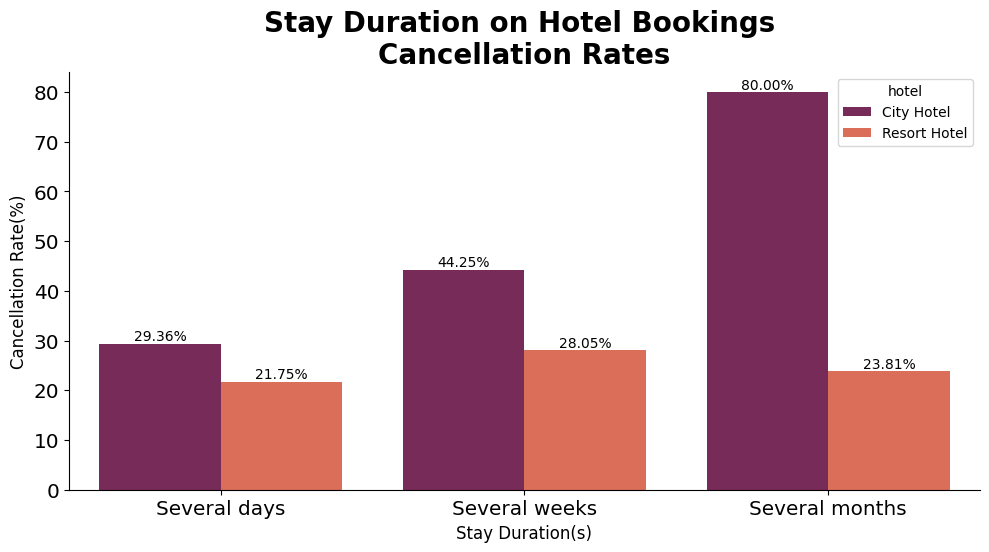

In [ ]:
# plot rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel
plt.figure(figsize=(10,5))
ax = sns.barplot(x='duration', y='cancel_ratio', hue='hotel', data=df2_cancel, palette='rocket')

plt.xlabel('Stay Duration(s)', fontsize=12)
plt.ylabel('Cancellation Rate(%)', fontsize=12)

sns.despine()
plt.tight_layout()

# Menambahkan label pada setiap bar
plt.bar_label(ax.containers[0], fmt='%.2f%%')
plt.bar_label(ax.containers[1], fmt='%.2f%%')

plt.title('Stay Duration on Hotel Bookings \nCancellation Rates', weight='bold', fontsize = 20)
plt.show()

## Insight

- Semakin lama durasi pemesanan, rasio pembatalan semakin besar untuk hotel berjenis 'City'.
- Untuk hotel dengan jenis 'Resort', rasio pembatalannya cenderung sama, tidak tergantung lamanya durasi booking.
- Secara keseluruhan rasio pembatalan hotel berjenis 'City' lebih besar dibanding 'Resort' hotel.

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

## Categorization of lead time

In [ ]:
# duplikat data
df3 = dfcopy.copy()

In [ ]:
# memeriksa detail kolom 'lead_time'
df3['lead_time'].describe()

count    85964.000000
mean        79.324880
std         85.504731
min          0.000000
25%         11.000000
50%         49.000000
75%        124.000000
max        737.000000
Name: lead_time, dtype: float64

<ipython-input-211-f1adcc57dde8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['lead_time'])


<Axes: xlabel='lead_time', ylabel='Density'>

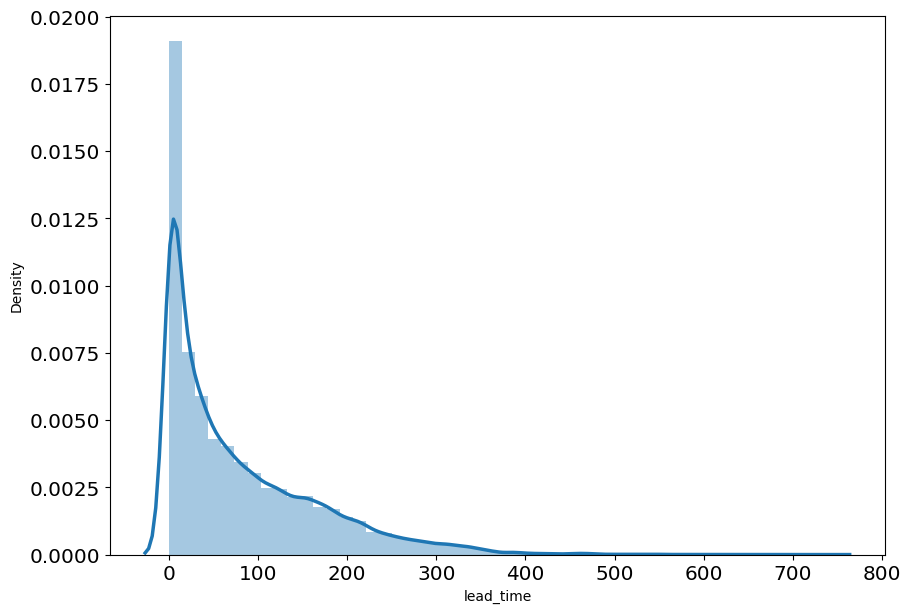

In [ ]:
# memeriksa distribusi data
sns.distplot(df2['lead_time'])

In [ ]:
# membuat kolom baru, mengkategorikan 'lead_time'
df3['lead_time_categorize'] = df3['lead_time'].apply(lambda m: 'Several days' if m < 7 else ('Several weeks' if m < 30 else ('Several months' if m < 365 else  'Several years')))
df3['lead_time_categorize']

0         Several months
1          Several years
2          Several weeks
3          Several weeks
4          Several weeks
               ...      
119385     Several weeks
119386    Several months
119387    Several months
119388    Several months
119389    Several months
Name: lead_time_categorize, Length: 85964, dtype: object

## The number of canceled hotel bookings


In [ ]:
# membuat agregat tabel perbandingan jumlah pemesan hotel terhadap waktu pemesanan
df3_cancel = df3[df3['is_canceled'] == 1].groupby(['hotel','lead_time_categorize']).aggregate({'is_canceled' : 'count'}).reset_index()
df3_keep = df3[df3['is_canceled'] == 0].groupby(['hotel','lead_time_categorize']).aggregate({'is_canceled' : 'count'}).reset_index()
df3_cancel['cancel_ratio'] = df3_cancel['is_canceled'] / (df3_cancel['is_canceled'] + df3_keep['is_canceled']) * 100
df3_cancel

,hotel,lead_time_categorize,is_canceled,cancel_ratio
0,City Hotel,Several days,916,10.141718
1,City Hotel,Several months,11832,36.669043
2,City Hotel,Several weeks,2900,26.941657
3,City Hotel,Several years,192,53.481894
4,Resort Hotel,Several days,454,5.776816
5,Resort Hotel,Several months,6190,31.843202
6,Resort Hotel,Several weeks,1199,19.775689
7,Resort Hotel,Several years,37,20.441989


In [ ]:
# mengurutkan tabel berdasarkan kategori lead time
df3_cancel['order_lead_time_categorize'] = df3_cancel['lead_time_categorize'].apply(lambda n: 1 if n == 'Several days' else (2 if n == 'Several weeks' else (3 if n == 'Several months' else 4)))
df3_cancel = df3_cancel.sort_values(['hotel', 'order_lead_time_categorize'])
df3_cancel = df3_cancel[['hotel', 'lead_time_categorize', 'is_canceled', 'cancel_ratio']]
df3_cancel

,hotel,lead_time_categorize,is_canceled,cancel_ratio
0,City Hotel,Several days,916,10.141718
2,City Hotel,Several weeks,2900,26.941657
1,City Hotel,Several months,11832,36.669043
3,City Hotel,Several years,192,53.481894
4,Resort Hotel,Several days,454,5.776816
6,Resort Hotel,Several weeks,1199,19.775689
5,Resort Hotel,Several months,6190,31.843202
7,Resort Hotel,Several years,37,20.441989


## Plot


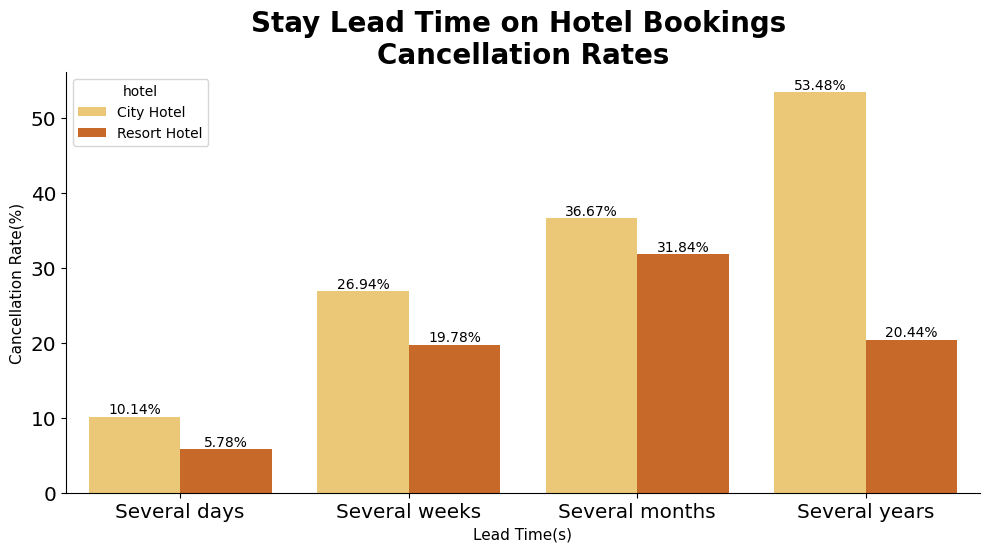

In [ ]:
# membuat plot rasio pembatalan pesanan terhadap lead time
plt.figure(figsize=(10,5))
ax = sns.barplot(x='lead_time_categorize', y='cancel_ratio', hue='hotel', data=df3_cancel, palette='YlOrBr')

# mendefinisikan sumbu x dan y
plt.xlabel('Lead Time(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

sns.despine()
plt.tight_layout()

# Menambahkan label pada setiap bar
plt.bar_label(ax.containers[0], fmt='%.2f%%')
plt.bar_label(ax.containers[1], fmt='%.2f%%')

plt.title('Stay Lead Time on Hotel Bookings \nCancellation Rates', weight='bold', fontsize = 20)
plt.show()

## Insight


- Semakin lama waktu pemesanan, kemungkinan pembatalan pesanan akan semakin besar.
- Jenis hotel 'Resort' memiliki rasio pembatalan pesanan lebih kecil dibanding 'City' hotel.
- 'Resort hotel' memiliki resio pembatalan tertinggi dalam interval waktu bulanan, namun untuk waktu yang lebih lama kecenderungan pembatalan pesanan menurun.